# **Machine Learning Week 2 Assignment**
### **Inchara Polepalli Muneshkumar**
**Student ID - 20307270**

**Dataset ID - 13-13-13**




In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.rcParams["figure.figsize"]=[12,9]

**Reading the dataset**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML/week2.csv",comment='#',header=None)
print (df.head())
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
X = np.column_stack((X1,X2))
y = df.iloc[:,2]
df.columns =['X1', 'X2', 'y']

      0     1  2
0  0.13  0.28  1
1  0.77  0.18  1
2  0.02  0.89  1
3 -0.13 -0.54 -1
4 -0.41 -0.48 -1


**Question (a)**

**i) Visualizing the downloaded data through a 2D plot**

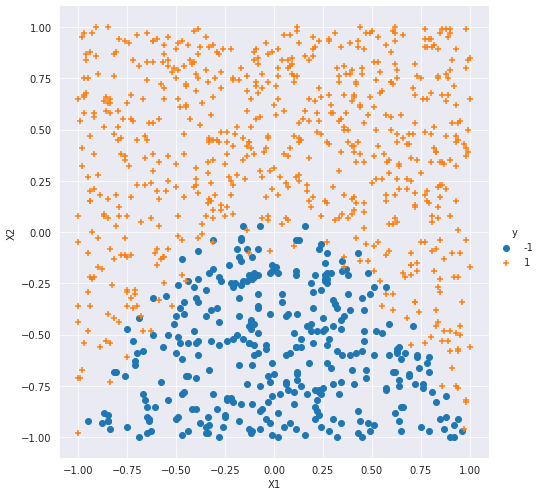

In [ ]:
sns.FacetGrid(df, hue="y",height=7,hue_kws=dict(marker=['o','+'])).map(plt.scatter, "X1", "X2").add_legend()
plt.show()

**Question (a)**

**ii) Training a Logistic Regression model using sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(penalty='none')
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Question (a) iii)**

**Predictions**

In [ ]:
predictions = model.predict(X)

**Reporting the model parameters**

In [ ]:
print("The LogisticRegression model intercept is %s and model coefficients are %s"% (model.intercept_, model.coef_))
score = metrics.accuracy_score(y,predictions)
print("The LogisticRegression model accuracy is",score)

The LogisticRegression model intercept is [1.70173516] and model coefficients are [[0.20678874 5.92448544]]
The LogisticRegression model accuracy is 0.8688688688688688


**Classification Report and Confusion Matrix**

In [ ]:
report = metrics.classification_report(y,predictions)
print("The LogisticRegression model report\n",report)

The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.81      0.80      0.80       336
           1       0.90      0.90      0.90       663

    accuracy                           0.87       999
   macro avg       0.85      0.85      0.85       999
weighted avg       0.87      0.87      0.87       999



In [ ]:
cm = metrics.confusion_matrix(y, predictions)
print("The LogisticRegression model confusion matrix\n",cm)

The LogisticRegression model confusion matrix
 [[268  68]
 [ 63 600]]


**Plotting the predictions**

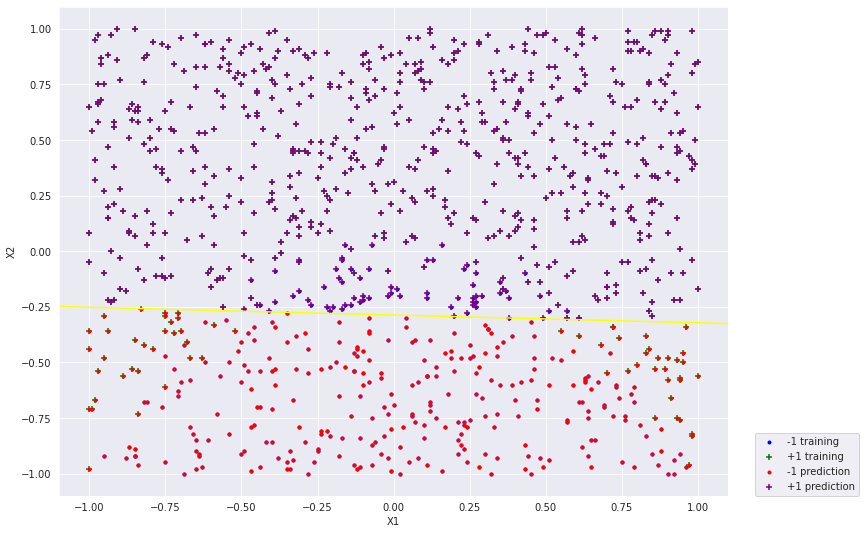

<Figure size 864x648 with 0 Axes>

In [ ]:
by_class = df.groupby('y')
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df = pd.DataFrame(np.column_stack((X1,X2,predictions)))
prediction_df.columns =['X1', 'X2', 'y_pred']
by_class_pred = prediction_df.groupby('y_pred')
for groups_pred, data_pred in by_class_pred:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot = plt.gca()
subplot.autoscale(False)
x_vals = np.array(subplot.get_xlim())
y_vals = -(x_vals * model.coef_[0][0] + model.intercept_)/model.coef_[0][1]
plt.plot(x_vals, y_vals, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**Question (b) i) and ii)**

**SVM Model with C = 0.001**

In [ ]:
from sklearn.svm import LinearSVC
svm_model_1 = LinearSVC(C=0.001).fit(X, y)
print("The SVM model with penalty 0.001 has intercept %s and the model coefficients are %s"% (svm_model_1.intercept_, svm_model_1.coef_))
svm_model_1_predictions = svm_model_1.predict(X)
svm_model_1_score = metrics.accuracy_score(y,svm_model_1_predictions)
print("The SVM model with penalty 0.001 has %s accuracy"%(svm_model_1_score))
svm_model_1_report = metrics.classification_report(y,svm_model_1_predictions)
print("Report of the SVM model with penalty 0.001 \n",svm_model_1_report)
svm_model_1_cm = metrics.confusion_matrix(y, svm_model_1_predictions)
print("Confusion matrix the SVM model with penalty 0.001\n",svm_model_1_cm)

The SVM model with penalty 0.001 has intercept [0.20260383] and the model coefficients are [[0.01227748 0.50258337]]
The SVM model with penalty 0.001 has 0.8628628628628628 accuracy
Report of the SVM model with penalty 0.001 
               precision    recall  f1-score   support

          -1       0.85      0.72      0.78       336
           1       0.87      0.94      0.90       663

    accuracy                           0.86       999
   macro avg       0.86      0.83      0.84       999
weighted avg       0.86      0.86      0.86       999

Confusion matrix the SVM model with penalty 0.001
 [[241  95]
 [ 42 621]]


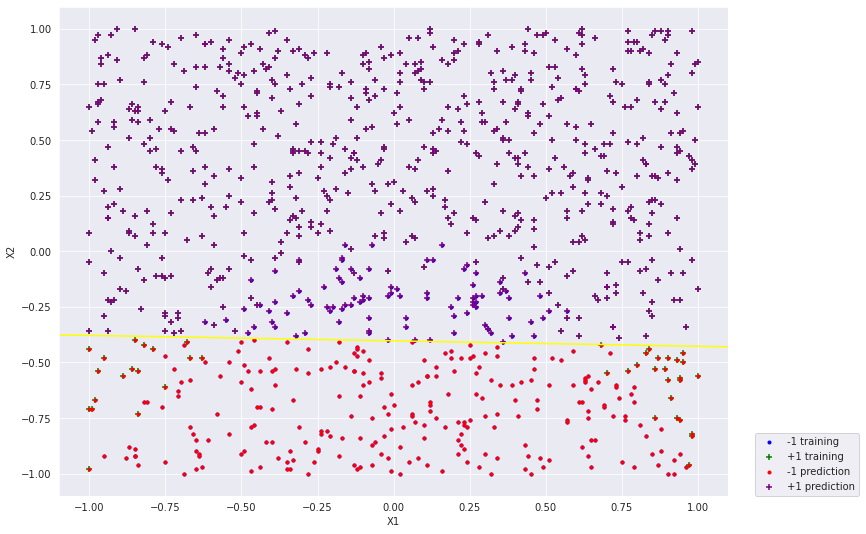

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_svm_1 = pd.DataFrame(np.column_stack((X1,X2,svm_model_1_predictions)))
prediction_df_svm_1.columns =['X1', 'X2', 'y_pred']
by_class_pred_svm_1 = prediction_df_svm_1.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_svm_1:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot_svm1 = plt.gca()
subplot_svm1.autoscale(False)
x_vals_svm1 = np.array(subplot_svm1.get_xlim())
y_vals_svm1 = -(x_vals_svm1 * svm_model_1.coef_[0][0] + svm_model_1.intercept_)/svm_model_1.coef_[0][1]
plt.plot(x_vals_svm1, y_vals_svm1, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**SVM Model with C = 0.01**

In [ ]:
svm_model_2 = LinearSVC(C=0.01).fit(X, y)
print("The SVM model with penalty 0.01 has intercept %s and the model coefficients are %s"% (svm_model_2.intercept_, svm_model_2.coef_))
svm_model_2_predictions = svm_model_2.predict(X)
svm_model_2_score = metrics.accuracy_score(y,svm_model_2_predictions)
print("The SVM model with penalty 0.01 has %s accuracy"%(svm_model_2_score))
svm_model_2_report = metrics.classification_report(y,svm_model_2_predictions)
print("Report of the SVM model with penalty 0.01 \n",svm_model_2_report)
svm_model_2_cm = metrics.confusion_matrix(y, svm_model_2_predictions)
print("Confusion matrix the SVM model with penalty 0.01\n",svm_model_2_cm)

The SVM model with penalty 0.01 has intercept [0.3244672] and the model coefficients are [[0.02886126 1.19602858]]
The SVM model with penalty 0.01 has 0.8738738738738738 accuracy
Report of the SVM model with penalty 0.01 
               precision    recall  f1-score   support

          -1       0.81      0.82      0.81       336
           1       0.91      0.90      0.90       663

    accuracy                           0.87       999
   macro avg       0.86      0.86      0.86       999
weighted avg       0.87      0.87      0.87       999

Confusion matrix the SVM model with penalty 0.01
 [[275  61]
 [ 65 598]]


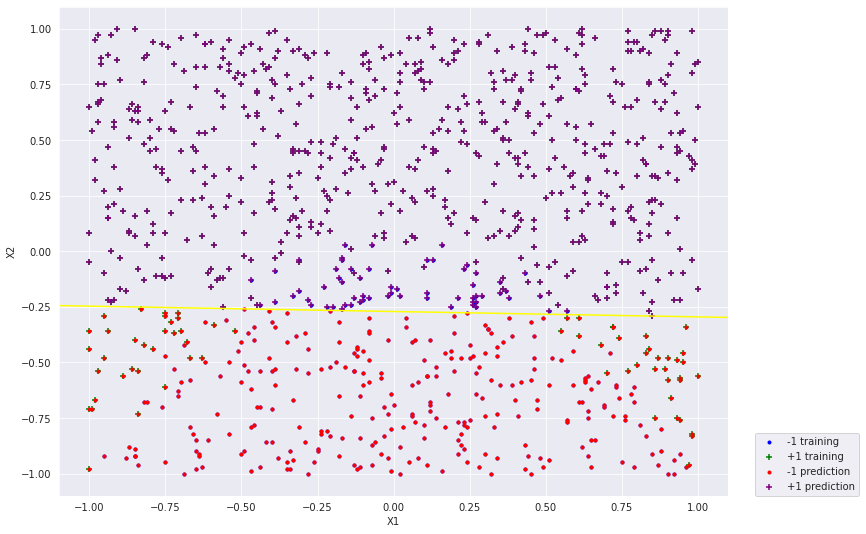

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_svm_2 = pd.DataFrame(np.column_stack((X1,X2,svm_model_2_predictions)))
prediction_df_svm_2.columns =['X1', 'X2', 'y_pred']
by_class_pred_svm_2 = prediction_df_svm_2.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_svm_2:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot_svm2 = plt.gca()
subplot_svm2.autoscale(False)
x_vals_svm2 = np.array(subplot_svm2.get_xlim())
y_vals_svm2 = -(x_vals_svm2 * svm_model_2.coef_[0][0] + svm_model_2.intercept_)/svm_model_2.coef_[0][1]
plt.plot(x_vals_svm2, y_vals_svm2, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**SVM Model with C = 0.1**

In [ ]:
svm_model_3 = LinearSVC(C=0.1).fit(X, y)
print("The SVM model with penalty 0.1 has intercept %s and the model coefficients are %s"% (svm_model_3.intercept_, svm_model_3.coef_))
svm_model_3_predictions = svm_model_3.predict(X)
svm_model_3_score = metrics.accuracy_score(y,svm_model_3_predictions)
print("The SVM model with penalty 0.1 has %s accuracy"%(svm_model_3_score))
svm_model_3_report = metrics.classification_report(y,svm_model_3_predictions)
print("Report of the SVM model with penalty 0.1 \n",svm_model_3_report)
svm_model_3_cm = metrics.confusion_matrix(y, svm_model_3_predictions)
print("Confusion matrix the SVM model with penalty 0.1\n",svm_model_3_cm)

The SVM model with penalty 0.1 has intercept [0.48343754] and the model coefficients are [[0.04739689 1.72491457]]
The SVM model with penalty 0.1 has 0.8708708708708709 accuracy
Report of the SVM model with penalty 0.1 
               precision    recall  f1-score   support

          -1       0.81      0.81      0.81       336
           1       0.90      0.90      0.90       663

    accuracy                           0.87       999
   macro avg       0.86      0.86      0.86       999
weighted avg       0.87      0.87      0.87       999

Confusion matrix the SVM model with penalty 0.1
 [[272  64]
 [ 65 598]]


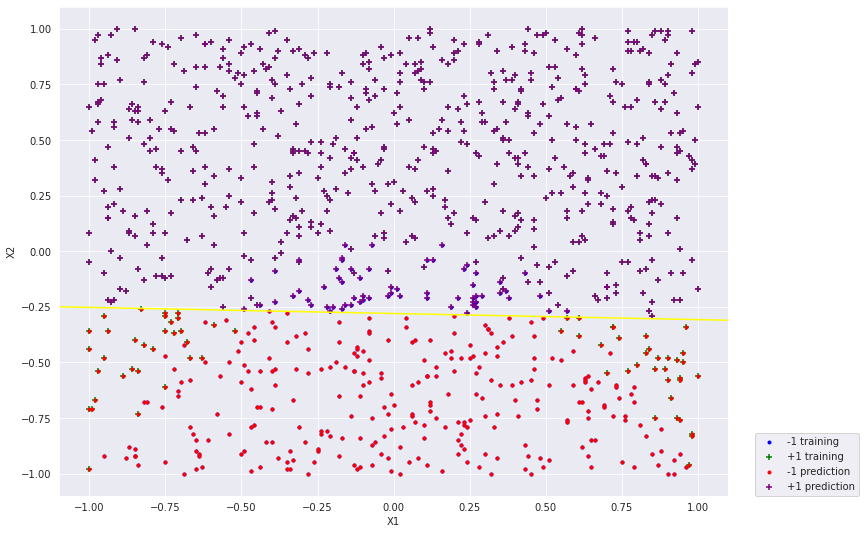

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_svm_3 = pd.DataFrame(np.column_stack((X1,X2,svm_model_3_predictions)))
prediction_df_svm_3.columns =['X1', 'X2', 'y_pred']
by_class_pred_svm_3 = prediction_df_svm_3.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_svm_3:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot_svm3 = plt.gca()
subplot_svm3.autoscale(False)
x_vals_svm3 = np.array(subplot_svm3.get_xlim())
y_vals_svm3 = -(x_vals_svm3 * svm_model_3.coef_[0][0] + svm_model_3.intercept_)/svm_model_3.coef_[0][1]
plt.plot(x_vals_svm3, y_vals_svm3, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**SVM Model with C = 1**

In [ ]:
svm_model_4 = LinearSVC(C=1).fit(X, y)
print("The SVM model with penalty 1 has intercept %s and the model coefficients are %s"% (svm_model_4.intercept_, svm_model_4.coef_))
svm_model_4_predictions = svm_model_4.predict(X)
svm_model_4_score = metrics.accuracy_score(y,svm_model_4_predictions)
print("The SVM model with penalty 1 has %s accuracy"%(svm_model_4_score))
svm_model_4_report = metrics.classification_report(y,svm_model_4_predictions)
print("Report of the SVM model with penalty 1 \n",svm_model_4_report)
svm_model_4_cm = metrics.confusion_matrix(y, svm_model_4_predictions)
print("Confusion matrix the SVM model with penalty 1\n",svm_model_4_cm)

The SVM model with penalty 1 has intercept [0.53195678] and the model coefficients are [[0.05650766 1.88546226]]
The SVM model with penalty 1 has 0.8718718718718719 accuracy
Report of the SVM model with penalty 1 
               precision    recall  f1-score   support

          -1       0.81      0.81      0.81       336
           1       0.90      0.90      0.90       663

    accuracy                           0.87       999
   macro avg       0.86      0.86      0.86       999
weighted avg       0.87      0.87      0.87       999

Confusion matrix the SVM model with penalty 1
 [[272  64]
 [ 64 599]]


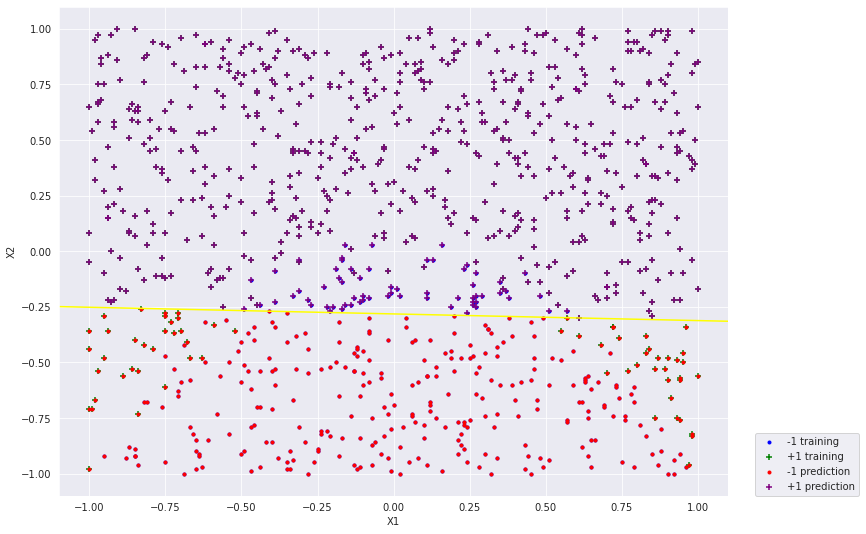

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_svm_4 = pd.DataFrame(np.column_stack((X1,X2,svm_model_4_predictions)))
prediction_df_svm_4.columns =['X1', 'X2', 'y_pred']
by_class_pred_svm_4 = prediction_df_svm_4.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_svm_4:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot_svm4 = plt.gca()
subplot_svm4.autoscale(False)
x_vals_svm4 = np.array(subplot_svm1.get_xlim())
y_vals_svm4 = -(x_vals_svm4 * svm_model_4.coef_[0][0] + svm_model_4.intercept_)/svm_model_4.coef_[0][1]
plt.plot(x_vals_svm4, y_vals_svm4, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**SVM Model with C = 10**

In [ ]:
svm_model_5 = LinearSVC(C=10).fit(X, y)
print("The SVM model with penalty 10 has intercept %s and the model coefficients are %s"% (svm_model_5.intercept_, svm_model_5.coef_))
svm_model_5_predictions = svm_model_5.predict(X)
svm_model_5_score = metrics.accuracy_score(y,svm_model_5_predictions)
print("The SVM model with penalty 10 has %s accuracy"%(svm_model_5_score))
svm_model_5_report = metrics.classification_report(y,svm_model_5_predictions)
print("Report of the SVM model with penalty 10 \n",svm_model_5_report)
svm_model_5_cm = metrics.confusion_matrix(y, svm_model_5_predictions)
print("Confusion matrix the SVM model with penalty 10\n",svm_model_5_cm)

The SVM model with penalty 10 has intercept [0.53812979] and the model coefficients are [[0.05784127 1.90574638]]
The SVM model with penalty 10 has 0.8718718718718719 accuracy
Report of the SVM model with penalty 10 
               precision    recall  f1-score   support

          -1       0.81      0.81      0.81       336
           1       0.90      0.90      0.90       663

    accuracy                           0.87       999
   macro avg       0.86      0.86      0.86       999
weighted avg       0.87      0.87      0.87       999

Confusion matrix the SVM model with penalty 10
 [[272  64]
 [ 64 599]]


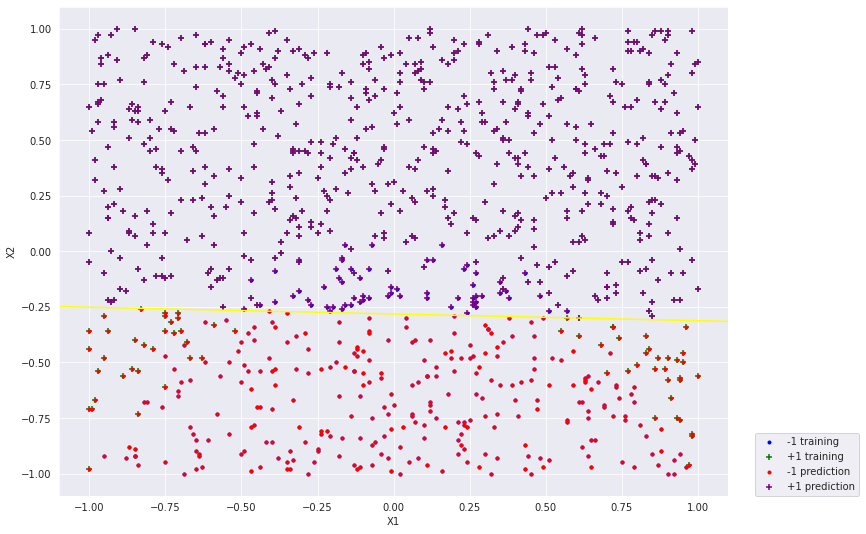

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_svm_5 = pd.DataFrame(np.column_stack((X1,X2,svm_model_5_predictions)))
prediction_df_svm_5.columns =['X1', 'X2', 'y_pred']
by_class_pred_svm_5 = prediction_df_svm_5.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_svm_5:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot_svm5 = plt.gca()
subplot_svm5.autoscale(False)
x_vals_svm5 = np.array(subplot_svm5.get_xlim())
y_vals_svm5 = -(x_vals_svm5 * svm_model_5.coef_[0][0] + svm_model_5.intercept_)/svm_model_5.coef_[0][1]
plt.plot(x_vals_svm5, y_vals_svm5, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**SVM Model with C = 100**

In [ ]:
svm_model_6 = LinearSVC(C=100).fit(X, y)
print("The SVM model with penalty 100 has intercept %s and the model coefficients are %s"% (svm_model_6.intercept_, svm_model_6.coef_))
svm_model_6_predictions = svm_model_6.predict(X)
svm_model_6_score = metrics.accuracy_score(y,svm_model_6_predictions)
print("The SVM model with penalty 100 has %s accuracy"%(svm_model_6_score))
svm_model_6_report = metrics.classification_report(y,svm_model_6_predictions)
print("Report of the SVM model with penalty 100 \n",svm_model_6_report)
svm_model_6_cm = metrics.confusion_matrix(y, svm_model_6_predictions)
print("Confusion matrix the SVM model with penalty 100\n",svm_model_6_cm)

The SVM model with penalty 100 has intercept [0.54160802] and the model coefficients are [[0.06018114 1.95798228]]
The SVM model with penalty 100 has 0.8708708708708709 accuracy
Report of the SVM model with penalty 100 
               precision    recall  f1-score   support

          -1       0.81      0.81      0.81       336
           1       0.90      0.90      0.90       663

    accuracy                           0.87       999
   macro avg       0.86      0.86      0.86       999
weighted avg       0.87      0.87      0.87       999

Confusion matrix the SVM model with penalty 100
 [[272  64]
 [ 65 598]]


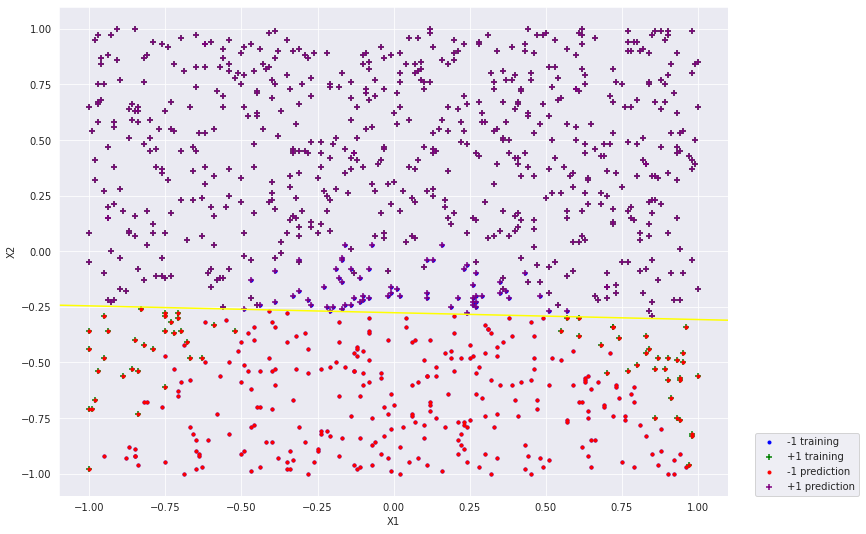

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_svm_6 = pd.DataFrame(np.column_stack((X1,X2,svm_model_6_predictions)))
prediction_df_svm_6.columns =['X1', 'X2', 'y_pred']
by_class_pred_svm_6 = prediction_df_svm_6.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_svm_6:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot_svm6 = plt.gca()
subplot_svm6.autoscale(False)
x_vals_svm6 = np.array(subplot_svm6.get_xlim())
y_vals_svm6 = -(x_vals_svm6 * svm_model_6.coef_[0][0] + svm_model_6.intercept_)/svm_model_6.coef_[0][1]
plt.plot(x_vals_svm6, y_vals_svm6, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**SVM Model with C = 1000**

In [ ]:
svm_model_7 = LinearSVC(C=1000).fit(X, y)
print("The SVM model with penalty 1000 has intercept %s and the model coefficients are %s"% (svm_model_7.intercept_, svm_model_7.coef_))
svm_model_7_predictions = svm_model_7.predict(X)
svm_model_7_score = metrics.accuracy_score(y,svm_model_7_predictions)
print("The SVM model with penalty 1000 has %s accuracy"%(svm_model_7_score))
svm_model_7_report = metrics.classification_report(y,svm_model_7_predictions)
print("Report of the SVM model with penalty 1000 \n",svm_model_7_report)
svm_model_7_cm = metrics.confusion_matrix(y, svm_model_7_predictions)
print("Confusion matrix the SVM model with penalty 1000\n",svm_model_7_cm)

The SVM model with penalty 1000 has intercept [1.01647445] and the model coefficients are [[0.51734733 2.06749778]]
The SVM model with penalty 1000 has 0.8318318318318318 accuracy
Report of the SVM model with penalty 1000 
               precision    recall  f1-score   support

          -1       0.87      0.59      0.70       336
           1       0.82      0.95      0.88       663

    accuracy                           0.83       999
   macro avg       0.84      0.77      0.79       999
weighted avg       0.84      0.83      0.82       999

Confusion matrix the SVM model with penalty 1000
 [[199 137]
 [ 31 632]]


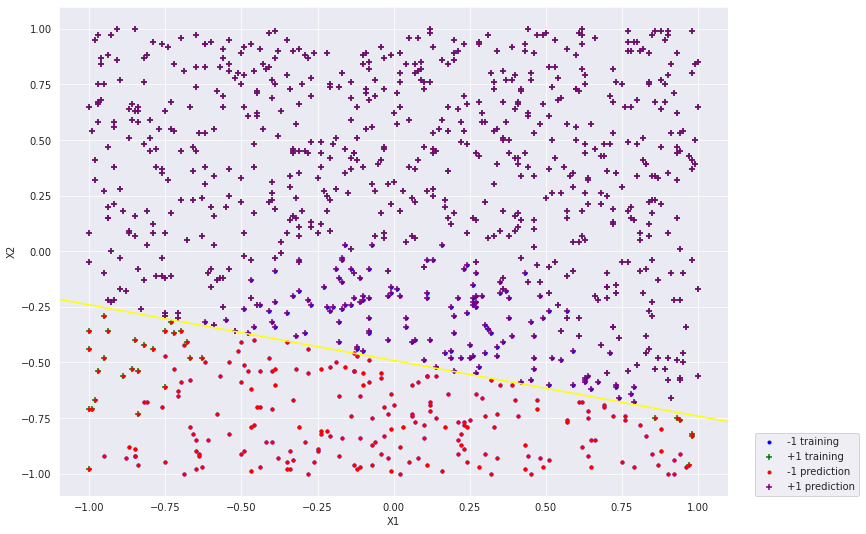

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_svm_7 = pd.DataFrame(np.column_stack((X1,X2,svm_model_7_predictions)))
prediction_df_svm_7.columns =['X1', 'X2', 'y_pred']
by_class_pred_svm_7 = prediction_df_svm_7.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_svm_7:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
subplot_svm7 = plt.gca()
subplot_svm7.autoscale(False)
x_vals_svm7 = np.array(subplot_svm7.get_xlim())
y_vals_svm7 = -(x_vals_svm7 * svm_model_7.coef_[0][0] + svm_model_7.intercept_)/svm_model_7.coef_[0][1]
plt.plot(x_vals_svm7, y_vals_svm7, color="yellow")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**Question (c)**

**(i) and (ii)**

**Adding new features**

In [ ]:
X1_square = np.square(X1)
X2_square = np.square(X2)
X_new = np.column_stack((X1,X2,X1_square,X2_square))
print(X_new)

[[ 1.300e-01  2.800e-01  1.690e-02  7.840e-02]
 [ 7.700e-01  1.800e-01  5.929e-01  3.240e-02]
 [ 2.000e-02  8.900e-01  4.000e-04  7.921e-01]
 ...
 [ 7.700e-01 -5.000e-02  5.929e-01  2.500e-03]
 [ 9.300e-01  3.200e-01  8.649e-01  1.024e-01]
 [ 4.000e-01 -6.700e-01  1.600e-01  4.489e-01]]


**Logistic Regression with two additional features**

In [ ]:
model_with_squares = LogisticRegression(penalty='none')
model_with_squares.fit(X_new,y)
print("The SVM model with additional features has intercept %s and the model coefficients are %s"% (model_with_squares.intercept_, model_with_squares.coef_))
model_with_squares_predictions = model_with_squares.predict(X_new)
model_with_squares_score = metrics.accuracy_score(y,model_with_squares_predictions)
print("The SVM model with additional features has %s accuracy"%(model_with_squares_score))
model_with_squares_report = metrics.classification_report(y,model_with_squares_predictions)
print("Report of the SVM model with additional features \n",model_with_squares_report)
model_with_squares_cm = metrics.confusion_matrix(y, model_with_squares_predictions)
print("Confusion matrix of the SVM model with additional features \n",model_with_squares_cm)

The SVM model with additional features has intercept [-0.37059953] and the model coefficients are [[ 0.05140397 21.96378028 22.19622337  0.13113941]]
The SVM model with additional features has 0.968968968968969 accuracy
Report of the SVM model with additional features 
               precision    recall  f1-score   support

          -1       0.95      0.96      0.95       336
           1       0.98      0.97      0.98       663

    accuracy                           0.97       999
   macro avg       0.96      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999

Confusion matrix of the SVM model with additional features 
 [[322  14]
 [ 17 646]]


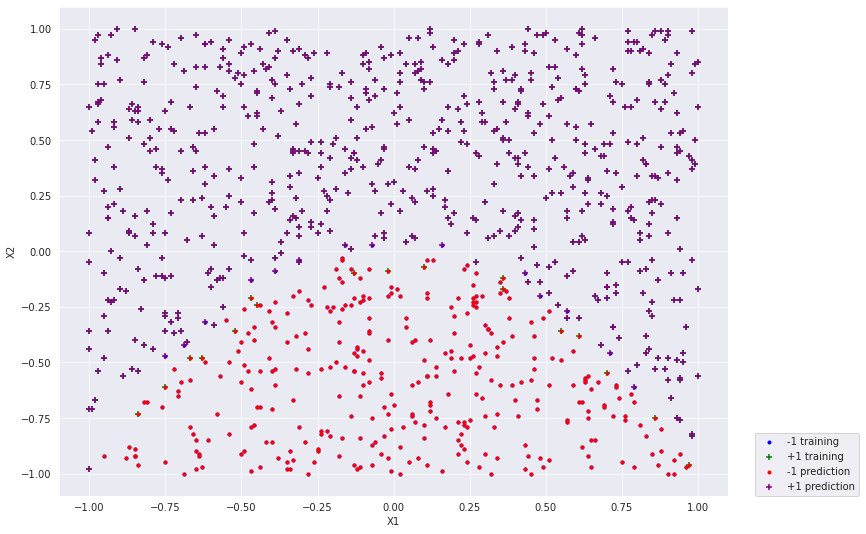

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
prediction_df_with_squares = pd.DataFrame(np.column_stack((X1,X2,model_with_squares_predictions)))
prediction_df_with_squares.columns =['X1', 'X2', 'y_pred']
by_class_pred_with_squares = prediction_df_with_squares.groupby('y_pred')
for groups_pred, data_pred in by_class_pred_with_squares:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**Question (c) (iii)**

**Dummy Classifier as Baseline Model**

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X, y)
dummy_predictions = dummy.predict(X)
dummy_model_score = metrics.accuracy_score(y,dummy_predictions)
print("The dummy model  has %s accuracy"%(dummy_model_score))
dummy_model_report = metrics.classification_report(y,dummy_predictions)
print("Report of dummy model \n",dummy_model_report)
dummy_model_cm = metrics.confusion_matrix(y, dummy_predictions)
print("Confusion matrix of the dummy model \n",dummy_model_cm)

The dummy model  has 0.6636636636636637 accuracy
Report of dummy model 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       663

    accuracy                           0.66       999
   macro avg       0.33      0.50      0.40       999
weighted avg       0.44      0.66      0.53       999

Confusion matrix of the dummy model 
 [[  0 336]
 [  0 663]]


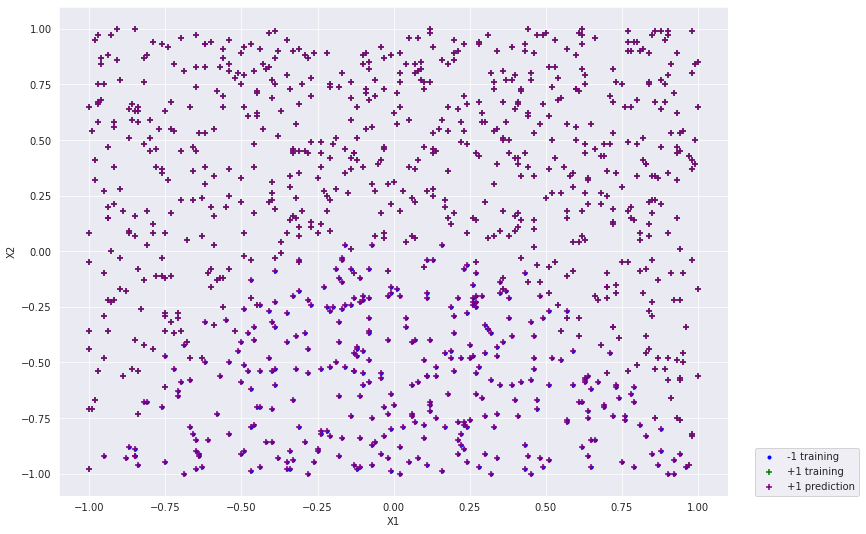

<Figure size 864x648 with 0 Axes>

In [ ]:
for groups, data in by_class:
  if(groups == -1):
    plt.scatter(data['X1'],data['X2'],color="blue",marker=".",label="-1 training")
  else:
    plt.scatter(data['X1'],data['X2'],color="green",marker="+",label="+1 training")
dummy_df = pd.DataFrame(np.column_stack((X1,X2,dummy_predictions)))
dummy_df.columns =['X1', 'X2', 'y_pred']
by_class_dummy = dummy_df.groupby('y_pred')
for groups_pred, data_pred in by_class_dummy:
  if(groups_pred == -1):
    plt.scatter(data_pred['X1'],data_pred['X2'],color="red",marker=".",label="-1 prediction")
  else:
    plt.scatter(data_pred['X1'],data_pred['X2'],color="purple",marker="+",label="+1 prediction")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc = (1.04,0))
plt.figure()
plt.show()

**Converting the notebook to PDF**

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/ML_Assignment_Week2.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ML_Assignment_Week2.ipynb to PDF
[NbConvertApp] Support files will be in ML_Assignment_Week2_files/
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Making directory ./ML_Assignment_Week2_files
[NbConvertApp] Writing 111043 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[